In [ ]:
#Mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing Libraries

import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow


Text(0.5, 1.0, 'Target')

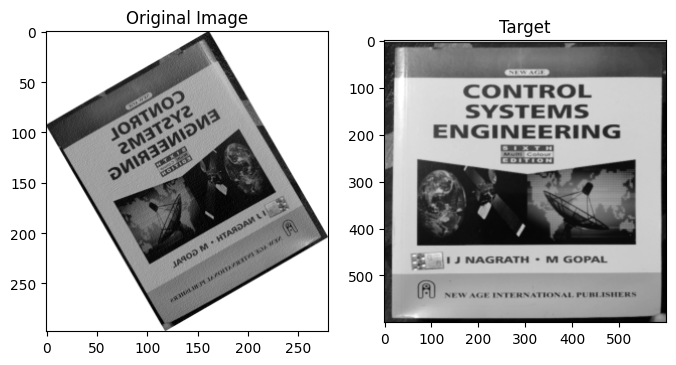

In [ ]:
#Importing Image:

imgsrc1 = "/content/drive/MyDrive/Labs/Computer Vision/Book_Pic_1.png"
imgsrc2 = "/content/drive/MyDrive/Labs/Computer Vision/Book_Pic_2.png"


img1 = cv2.imread(imgsrc2,0)
#img1 = cv2.resize(img1, (500,750))

img2 = cv2.imread(imgsrc1,0)
img2 = cv2.resize(img2, (600,600))

figure, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img1, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(img2, cmap='gray')
ax[1].set_title("Target")

**Compute Keypoints and Descriptors**

Descriptors:
 [[  0.   1.  82. ...   0.   0.   2.]
 [  8.   3.   1. ...  62. 134.   0.]
 [  0.   0.   0. ...   0.   1.   2.]
 ...
 [  0.   0.   0. ...   0.   0.   1.]
 [  0.   6. 145. ...   0.   0.   0.]
 [  0.   0.   0. ...  25.  48.   0.]]


Text(0.5, 1.0, 'Keypoints')

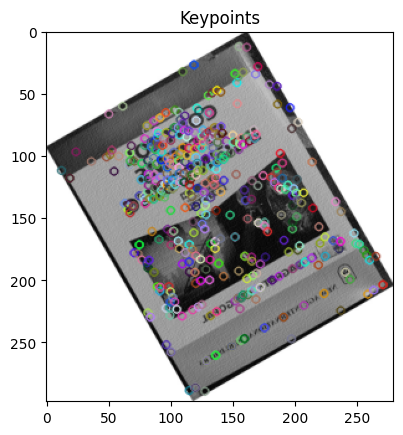

In [ ]:
#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
img_1 = img1.copy()
img_1 = cv2.drawKeypoints(img1,keypoints_1,img_1)
print("Descriptors:\n",descriptors_1)
plt.imshow(img_1)
plt.title("Keypoints")

**ORB (Oriented FAST and Rotated BRIEF)**

In [ ]:
#ORB (Oriented FAST and Rotated BRIEF)
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

len(kp1), len(kp2)

(477, 500)

Text(0.5, 1.0, 'Feature Matching using ORB')

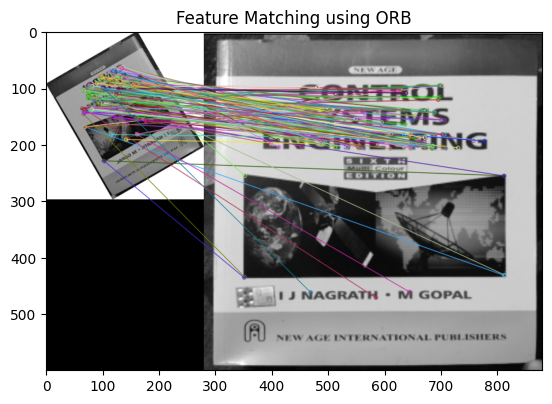

In [ ]:
#Matching the keypoints (features)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

#Picking the top 1500 matches
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:1500], img2, flags=2)
plt.imshow(img3)
plt.title("Feature Matching using ORB")

**Homography Transform (ORB)**

In [ ]:
#Finding homography transform
src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 25.0)
print("Homography Transform:\n",M)

Homography Transform:
 [[-4.20763045e+00  5.58149657e-01  3.87711504e+02]
 [-2.14710272e+00  3.16463839e-01  1.94299623e+02]
 [-1.06407417e-02  1.24954145e-03  1.00000000e+00]]


Text(0.5, 1.0, 'Aligned Image')

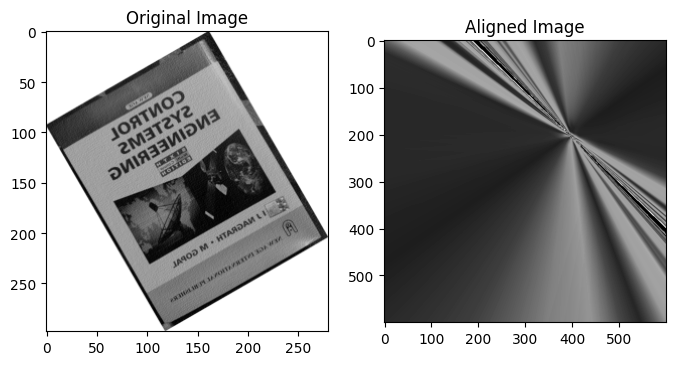

In [ ]:
#Applying transform to 1st image
aligned_img = cv2.warpPerspective(img1, M, (img2.shape[1], img2.shape[0]))

figure, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img1, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(aligned_img, cmap='gray')
ax[1].set_title("Aligned Image")

**SIFT (Scale Invarient Feature Transform)**

In [ ]:
#SIFT (Scale Invarient Feature Transform)
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

len(keypoints_1), len(keypoints_2)

(485, 1246)

Text(0.5, 1.0, 'Feature Matching using SIFT')

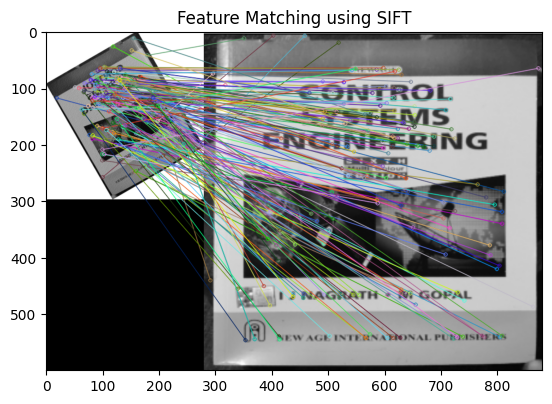

In [ ]:
#Matching the keypoints (features)
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:1500], img2, flags=2)
plt.imshow(img3)
plt.title("Feature Matching using SIFT")

**Homography Transform (SIFT)**

In [ ]:
#Finding homography transform
src_pts = np.float32([keypoints_1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints_2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
print("Homography Transform:\n",M)

Homography Transform:
 [[-2.80818300e+00  1.63583941e+00  4.48370574e+02]
 [ 1.24591428e+00  2.19231046e+00 -1.97707221e+02]
 [-4.32947884e-05  4.61700184e-05  1.00000000e+00]]


Text(0.5, 1.0, 'Aligned Image')

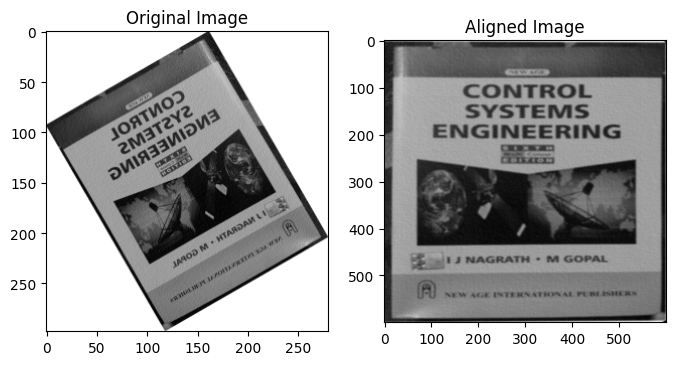

In [ ]:
#Applying transform to 1st image
aligned_img = cv2.warpPerspective(img1, M, (img2.shape[1], img2.shape[0]))
figure, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img1, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(aligned_img, cmap='gray')
ax[1].set_title("Aligned Image")